<div dir=ltr align=center>In the name of God</div>
<br>
<font size=6><div dir=ltr align=center>
<font size=5>
Intelligent Analysis of
Biomedical Images
<br>
<font size=4>
sharif university of technology, CE department
</font>
<br>
<font size=3>
Dr. Rohban
</font>
<br>
<br>
<font size=6>
Homework 2
</font><br>
<font size=4>


Name: Alireza Sabounchi

STID: 401212454

In the following notebook, we aims to develop a Convolutional Neural Network (CNN) using the PyTorch framework that can accurately detect and classify Brain Tumors from MRI scans. The CNN will be trained on a large dataset of labeled brain tumor images to learn the patterns and features associated with different tumor types.

## <b>1 <span style='color:#e61227'>|</span> reuirements and libraries</b>

Feel free to add any other library you need.


In [1]:
!pip install split-folders
!pip install torch-summary

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid')
import copy
import os
import torch
from PIL import Image
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
from torchvision import utils
from torchvision.datasets import ImageFolder
import splitfolders
from torchsummary import summary
import torch.nn.functional as F
import pathlib
from sklearn.metrics import classification_report
import itertools
from tqdm.notebook import trange, tqdm
from torch import optim
import warnings
warnings.filterwarnings('ignore')
###
np.random.seed(42)
torch.manual_seed(42)

## <b>2 <span style='color:#e61227'>|</span> Dataset</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>2.1 |</span></b> Download and load Dataset</b></p>
</div>

In [3]:
!pip install gdown

In [4]:
!gdown 1hwV1mcc-Bm_AY_t_FG8byxKFmhY4uGsh
!unzip brain.zip

Downloading...
From (original): https://drive.google.com/uc?id=1hwV1mcc-Bm_AY_t_FG8byxKFmhY4uGsh
From (redirected): https://drive.google.com/uc?id=1hwV1mcc-Bm_AY_t_FG8byxKFmhY4uGsh&confirm=t&uuid=81f2f4cc-afab-4eb4-bf3f-76cf0bd82c06
To: /kaggle/working/brain.zip
100%|████████████████████████████████████████| 111M/111M [00:03<00:00, 29.5MB/s]
Archive:  brain.zip
   creating: brain/
   creating: brain/val/
   creating: brain/val/Healthy/
  inflating: brain/val/Healthy/Not Cancer  (710).jpg  
  inflating: brain/val/Healthy/Not Cancer  (1600).jpg  
  inflating: brain/val/Healthy/Not Cancer  (1008).jpg  
  inflating: brain/val/Healthy/Not Cancer  (45).jpg  
  inflating: brain/val/Healthy/Not Cancer  (1208).jpg  
  inflating: brain/val/Healthy/Not Cancer  (1069).jpg  
  inflating: brain/val/Healthy/Not Cancer  (11).jpg  
  inflating: brain/val/Healthy/Not Cancer  (1823).jpg  
  inflating: brain/val/Healthy/Not Cancer  (111).jpg  
  inflating: brain/val/Healthy/Not Cancer  (115).jpg  
  infla

## <b>3 <span style='color:#e61227'>|</span> Data Preparation </b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>3.1 |</span></b> Splitting Dataset</b></p>
</div>

- We need to evaluate the model on validation datasets to track the model's performance during training. Then, We use 20% of the dataset for the **Validation set** and use the rest as the **Training set**, so we have an **80/20** split!

In [5]:
# Dataset Path
# data_dir = '/content/brain'
data_dir = '/kaggle/working/brain'
data_dir = pathlib.Path(data_dir)

In [6]:
# define transformation
# transform images to (256, 256) and normalize them
transform = transforms.Compose(
    [
########################################
          ### TODO ###
########################################
    transforms.Resize((256, 256), interpolation=transforms.InterpolationMode.BILINEAR, antialias=True),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation([-30.0, 30.0], interpolation=transforms.InterpolationMode.NEAREST),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], # Based on next section's outputs
        std=[0.229, 0.224, 0.225]
    )
   ]
)

## <b>4 <span style='color:#e61227'>|</span> Image Augmentation Definitions</b>

In [7]:
# Define an object of the custom dataset for the train and validation.
train_set = torchvision.datasets.ImageFolder(data_dir.joinpath("train"), transform=transform)
train_set.transform
val_set = torchvision.datasets.ImageFolder(data_dir.joinpath("val"), transform=transform)
val_set.transform

Compose(
    Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

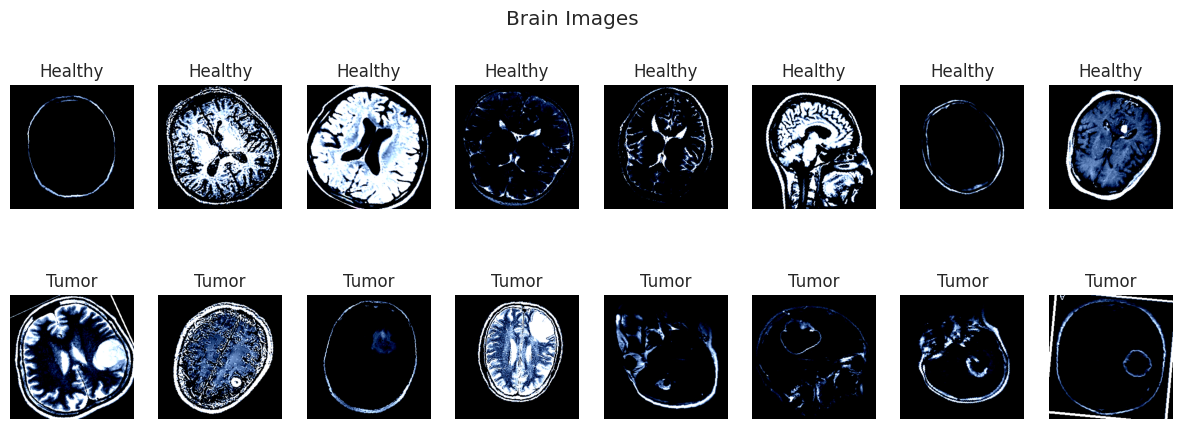

In [8]:
# Visualiztion some images from Train Set, half healthy and half tumor images

########################################
          ### TODO ###
########################################
def show_samples(dataset, n_samples=16):

    healthy_indices = [idx for idx, (_, label) in enumerate(dataset) if label == 1] ### which is healthy???
    tumor_indices = [idx for idx, (_, label) in enumerate(dataset) if label == 0]

    n_per_class = n_samples // 2
    healthy_samples = np.random.choice(healthy_indices, n_per_class)
    tumor_samples = np.random.choice(tumor_indices, n_per_class)
    

    fig = plt.figure(figsize=(15, 5))
    plt.suptitle('Brain Images')
    gs = plt.GridSpec(2, n_per_class)
    
    # Plot healthy
    for idx, sample_idx in enumerate(healthy_samples):
        ax = plt.subplot(gs[0, idx])
        img, _ = dataset[sample_idx]
        img = img.permute(1, 2, 0) # Wrong order! (channel, width, height)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title('Healthy')
    
    # Plot tumor
    for idx, sample_idx in enumerate(tumor_samples):
        ax = plt.subplot(gs[1, idx])
        img, _ = dataset[sample_idx]
        img = img.permute(1, 2, 0)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title('Tumor')
    
    plt.show()

show_samples(train_set)

## <b>5 <span style='color:#e61227'>|</span> Creating Dataloaders</b>

In [9]:
# import and load train, validation
batch_size = 64

train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, shuffle = True, num_workers = 2)
val_loader = torch.utils.data.DataLoader(val_set, batch_size = batch_size, shuffle = True, num_workers = 2)


In [10]:
# print shape for Training data and Validation data
for key, value in {'Training data': train_loader, "Validation data": val_loader}.items():
    for X, y in value:
        print(f"{key}:")
        print(f"Shape of X : {X.shape}")
        print(f"Shape of y: {y.shape} {y.dtype}\n")
        break

Training data:
Shape of X : torch.Size([64, 3, 256, 256])
Shape of y: torch.Size([64]) torch.int64

Validation data:
Shape of X : torch.Size([64, 3, 256, 256])
Shape of y: torch.Size([64]) torch.int64



## <b>6 <span style='color:#e61227'>|</span> Define Brain Tumor Classifier</b>


In [11]:
'''This function can be useful in determining the output size of a convolutional layer in a neural network,
given the input dimensions and the convolutional layer's parameters. You may not use it in your code'''

def findConv2dOutShape(hin,win,conv,pool=2):
    # get conv arguments
    kernel_size = conv.kernel_size
    stride=conv.stride
    padding=conv.padding
    dilation=conv.dilation

    hout=np.floor((hin+2*padding[0]-dilation[0]*(kernel_size[0]-1)-1)/stride[0]+1)
    wout=np.floor((win+2*padding[1]-dilation[1]*(kernel_size[1]-1)-1)/stride[1]+1)

    if pool:
        hout/=pool
        wout/=pool
    return int(hout),int(wout)

In [12]:
# Define any arbitrary Architecture For CNN_TUMOR Model


class CNN_TUMOR(nn.Module):

    # Network Initialisation
    def __init__(self, params):

        super(CNN_TUMOR, self).__init__()

        Cin,Hin,Win = params["shape_in"]
        init_f = params["initial_filters"]
        num_fc1 = params["num_fc1"]
        num_classes = params["num_classes"]
        self.dropout_rate = params["dropout_rate"]

        ########################################
                  ### TODO ###
        # define layers of the model here
        ########################################
        # Layer 1
        self.conv1 = nn.Conv2d(Cin, init_f, kernel_size=7, padding=3)
        self.bn1 = nn.BatchNorm2d(init_f)
        self.pool1 = nn.MaxPool2d(2, 2)

        # Layer 2
        self.conv2 = nn.Conv2d(init_f, init_f*2, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm2d(init_f*2)
        self.pool2 = nn.MaxPool2d(2, 2)

        # Layer 3
        self.conv3 = nn.Conv2d(init_f*2, init_f*4, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(init_f*4)
        self.pool3 = nn.MaxPool2d(2, 2)

        # Layer 4
        self.conv4 = nn.Conv2d(init_f*4, init_f*8, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(init_f*8)
        self.pool4 = nn.MaxPool2d(2, 2)

        # Global average pooling
        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Fully Connected
        self.fc1 = nn.Linear(init_f*8, num_fc1)
        self.fc2 = nn.Linear(num_fc1, num_classes)

        # Dropout
        self.dropout_conv = nn.Dropout(0.3)
        self.dropout_fc = nn.Dropout(self.dropout_rate)

    def forward(self,X):

        ########################################
                  ### TODO ###
        ########################################
        # Layer 1
        X = self.pool1(F.relu(self.bn1(self.conv1(X))))
        X = self.dropout_conv(X)
        
        # Layer 2
        X = self.pool2(F.relu(self.bn2(self.conv2(X))))
        X = self.dropout_conv(X)
        
        # Layer 3
        X = self.pool3(F.relu(self.bn3(self.conv3(X))))
        X = self.dropout_conv(X)
        
        # Layer 4
        X = self.pool4(F.relu(self.bn4(self.conv4(X))))
        X = self.dropout_conv(X)
        
        # Global average pooling
        X = self.global_pool(X)
        
        # Flatten
        X = X.view(X.size(0), -1)
        
        # Fully connected + dropout
        X = F.relu(self.fc1(X))
        X = self.dropout_fc(X)
        X = self.fc2(X)
        
        return X

In [13]:
# define parameters of the model
params_model={
    "shape_in": (3, 256, 256),  # (channels, height, width)
    "initial_filters": 32,
    "num_fc1": 512,
    "dropout_rate": 0.5,
    "num_classes": 2
}

# Create instantiation of Network class
cnn_model = CNN_TUMOR(params_model)

# define computation hardware approach (GPU/CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = cnn_model.to(device)

## <b>7 <span style='color:#e61227'>|</span> Loss Function Definition</b>

In [14]:
# define the loss function
weights = torch.tensor([1.5, 1]).to(device)  # move the damn weights to the correct device!!!
loss_func = nn.CrossEntropyLoss(weight=weights)

## <b>8 <span style='color:#e61227'>|</span> Optimiser Definition</b>

In [15]:
# define the optimizer

opt = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

## <b>9 <span style='color:#e61227'>|</span> Training Model</b>

In [16]:
# Function to compute the loss value per batch of data
def loss_batch(loss_func, output, target):

    ########################################
              ### TODO ###
    ########################################
    target = target.to(output.device)
    # print(target.device, output.device)
    loss = loss_func(output, target)
    
    preds = torch.argmax(output, dim=1)
    metric_b = torch.sum(preds == target).item()
    return loss, metric_b

# Compute the loss value & performance metric for the entire dataset (epoch)
def loss_epoch(model,loss_func,dataset_dl,opt):

    run_loss=0.0
    accuracy=0.0
    len_data=len(dataset_dl.dataset)

    # internal loop over dataset

    ########################################
              ### TODO ###
    ########################################
    for xb, yb in dataset_dl:
        xb = xb.to(device)
        yb = yb.to(device)
        
        # Forward
        output = model(xb)
        loss_b, metric_b = loss_batch(loss_func, output, yb)
        run_loss += loss_b * xb.size(0)  # multiply by batch size!!!
        #print(run_loss, loss_b, xb.size(0))
        accuracy += metric_b
        #print(accuracy)
        
        # Perform backward pass and optimization if training mode
        if opt is not None:
            opt.zero_grad()
            loss_b.backward()
            opt.step()
            
    loss = run_loss / len_data
    accuracy = accuracy / len_data
    
    return loss, accuracy

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>9.2 |</span></b> Training Function</b></p>
</div>


In [17]:
def Train_Val(model, train_dl, val_dl, epochs, opt, lr_scheduler, loss_func):

    loss_history={"train": [],"val": []}
    metric_history={"train": [],"val": []}
    # a deep copy of weights for the best performing model
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss=float('inf')

    for epoch in tqdm(range(epochs)):

        ########################################
                  ### TODO ###
        # train the model for n epoch. report loss value and accuracy of the model for train and val datasets
        # in each epoch, save the weights of the best model
        ########################################
        # Train mode
        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, opt)
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        
        # Evaluation mode
        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl, opt=None) # NO OPT!!!
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)
        
        # Learning rate scheduling
        lr_scheduler.step(val_loss)
        
        # Save best model
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            
        print(f"train loss: {train_loss:.6f}, val loss: {val_loss:.6f}, accuracy: {100*val_metric:.2f}")
        print("-"*10)

    # load best model weights
    model.load_state_dict(best_model_wts)
    
    return model, loss_history, metric_history

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>9.3 |</span></b> Training Process </b></p>
</div>

In [18]:
# Define parameters used for training and evaluation of a cnn_model
epochs = 20

# train and validate the model
cnn_model,loss_hist,metric_hist = Train_Val(cnn_model, train_loader, val_loader, epochs, opt, lr_scheduler, loss_func)

  0%|          | 0/20 [00:00<?, ?it/s]

train loss: 0.631428, val loss: 0.745732, accuracy: 54.61
----------
train loss: 0.559863, val loss: 0.677493, accuracy: 52.99
----------
train loss: 0.490112, val loss: 0.507979, accuracy: 72.86
----------
train loss: 0.451585, val loss: 0.737880, accuracy: 64.39
----------
train loss: 0.429605, val loss: 0.528387, accuracy: 72.10
----------
train loss: 0.423343, val loss: 0.470781, accuracy: 75.68
----------
train loss: 0.429436, val loss: 0.890740, accuracy: 59.83
----------
train loss: 0.397853, val loss: 0.434316, accuracy: 77.42
----------
train loss: 0.375234, val loss: 0.373545, accuracy: 81.22
----------
train loss: 0.362221, val loss: 0.990600, accuracy: 59.93
----------
train loss: 0.361576, val loss: 0.923891, accuracy: 69.38
----------
train loss: 0.372766, val loss: 1.029623, accuracy: 56.57
----------
train loss: 0.359065, val loss: 0.377384, accuracy: 84.58
----------
train loss: 0.356603, val loss: 0.509009, accuracy: 73.51
----------
train loss: 0.336543, val loss: 0.

## <b>10 <span style='color:#e61227'>|</span> Evaluation Metric Visualization </b>

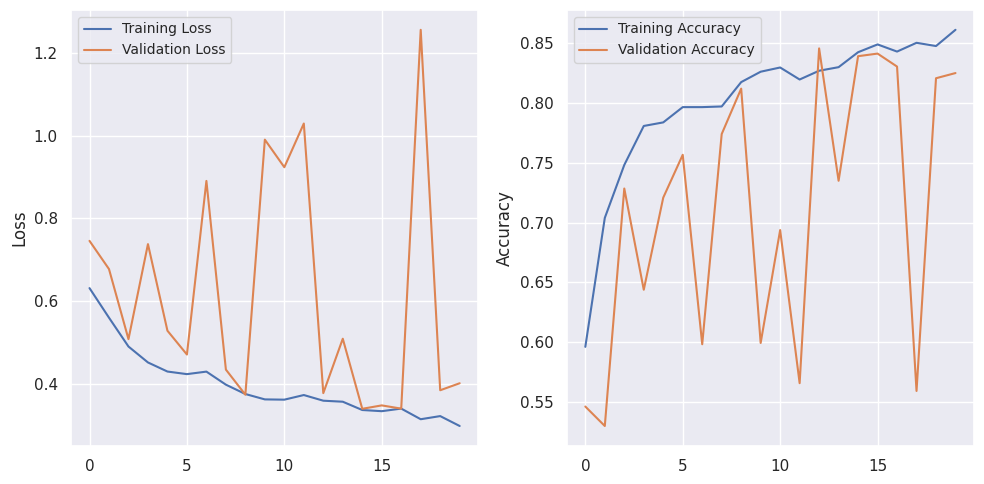

In [19]:
# Convergence History Plot
# plot the loss vlues and accuracy of your model during the training process
def plot_training_history(loss_history, metric_history):

    # Move loss & acc to CPU 
    train_loss = [loss.detach().cpu().item() if torch.is_tensor(loss) else loss for loss in loss_history['train']]
    val_loss = [loss.detach().cpu().item() if torch.is_tensor(loss) else loss for loss in loss_history['val']]
    train_acc = [acc.detach().cpu().item() if torch.is_tensor(acc) else acc for acc in metric_history['train']]
    val_acc = [acc.detach().cpu().item() if torch.is_tensor(acc) else acc for acc in metric_history['val']]
    

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    # Plot Loss
    ax1.plot(train_loss, label='Training Loss')
    ax1.plot(val_loss, label='Validation Loss')
    ax1.set_ylabel('Loss')
    ax1.grid(True)
    ax1.legend(fontsize=10)

    # Plot Accuracy
    ax2.plot(train_acc, label='Training Accuracy')
    ax2.plot(val_acc, label='Validation Accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    ax2.legend(fontsize=10)
    plt.tight_layout()
    plt.show()
    
plot_training_history(loss_hist, metric_hist)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>10.2 |</span></b> Confusion_Matrix </b></p>
</div>

In [20]:
# define function For Classification Report
def Ture_and_Pred(val_loader, model):
    model.eval()
    y_true = []
    y_pred = []
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Forward
            outputs = model(inputs)
            
            # Get preds
            _, predicted = torch.max(outputs, 1)
            
            # Append batch preds and labels
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    
    return y_true, y_pred


def confusion_matrix(y_true, y_pred):
    cm = np.zeros((2, 2), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[t][p] += 1
    return cm

# check confusion matrix for error analysis
y_true, y_pred = Ture_and_Pred(val_loader, cnn_model)

print(classification_report(y_true, y_pred, target_names=['Brain Tumor', 'Healthy']))
cm = confusion_matrix(y_true, y_pred)

              precision    recall  f1-score   support

 Brain Tumor       0.83      0.90      0.86       503
     Healthy       0.87      0.77      0.82       418

    accuracy                           0.84       921
   macro avg       0.85      0.84      0.84       921
weighted avg       0.84      0.84      0.84       921



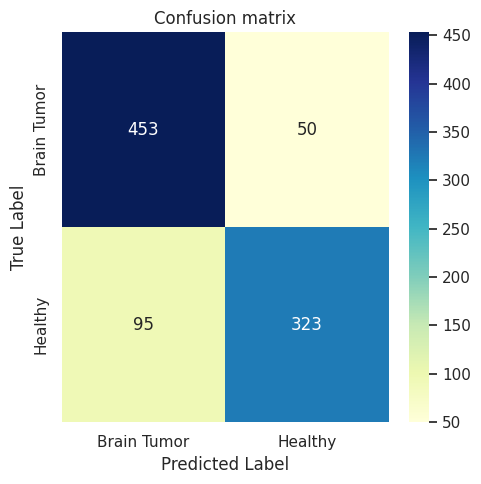

In [21]:
# Confusion Matrix Plotting Function
def show_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.YlGnBu):

    ########################################
               ### TODO ###
    # visualize the confusion matrix
    ########################################
    plt.figure(figsize=(5, 5))
    classes = ['Brain Tumor', 'Healthy']  # 0 = Tumor, 1 = Healthy
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

show_confusion_matrix(cm)